In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
dataset=sns.load_dataset('tips')
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats


In [2]:
df = pd.read_csv('adult.csv')


In [3]:
df.head()


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 14)

In [5]:
df["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
df["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [7]:
data_num=df.copy()

In [8]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [10]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
attrib, counts=np.unique(df['workclass'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
df['workclass'][df['workclass']=='?']=most_freq_attrib


attrib, counts=np.unique(df['occupation'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
df['occupation'][df['occupation']=='?']=most_freq_attrib


attrib, counts=np.unique(df['native-country'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
df['native-country'][df['native-country']=='?']=most_freq_attrib



In [12]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df['workclass'][df['workclass']=='?']

Series([], Name: workclass, dtype: object)

In [14]:
df.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [15]:
df['income']=df['income'].map({'<=50K':0,'>50K':1})
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [16]:
data_num=df.drop(['educational-num','income'],axis=1)
data_num.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [17]:
#EDA()

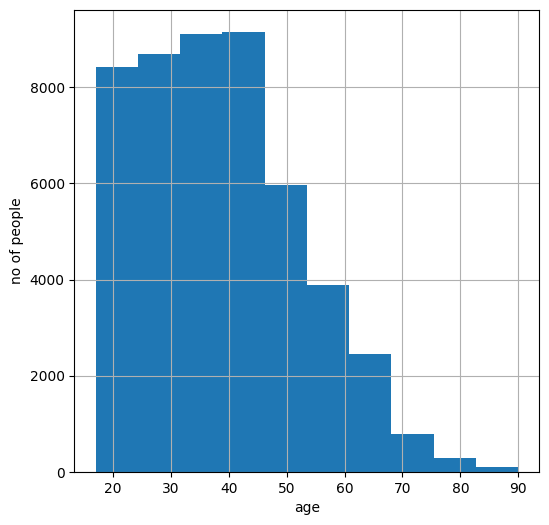

In [18]:
df['age'].hist(figsize=(6,6))
plt.xlabel('age')
plt.ylabel('no of people')
plt.show()

In [19]:
df[df['age']>60].shape

(3606, 14)

<Axes: ylabel='age'>

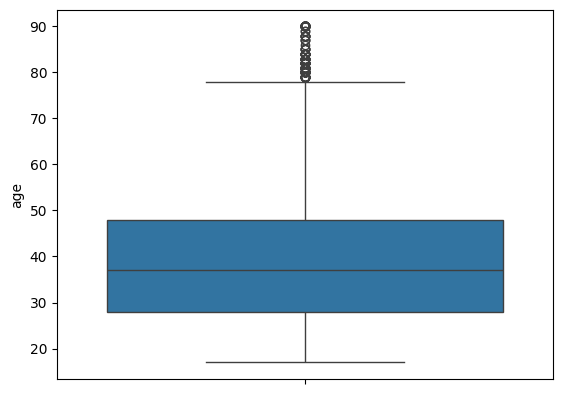

In [20]:
sns.boxplot(df['age'])

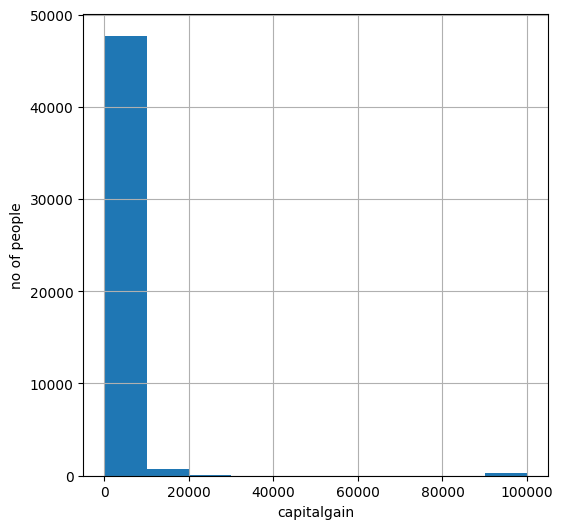

In [21]:
df['capital-gain'].hist(figsize=(6,6))
plt.xlabel('capitalgain')
plt.ylabel('no of people')
plt.show()

In [22]:
df[df['capital-gain']>2000].shape

(3807, 14)

<Axes: ylabel='capital-gain'>

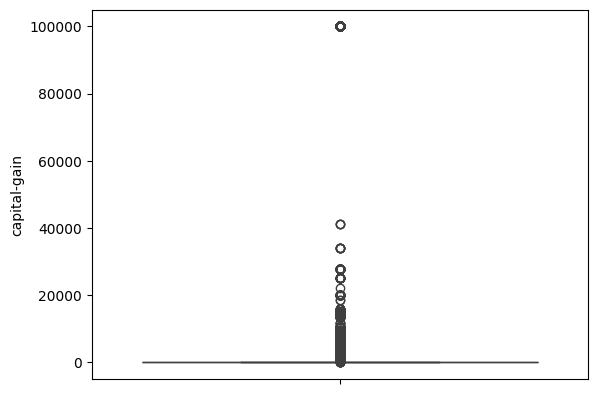

In [23]:
sns.boxplot(df['capital-gain'])

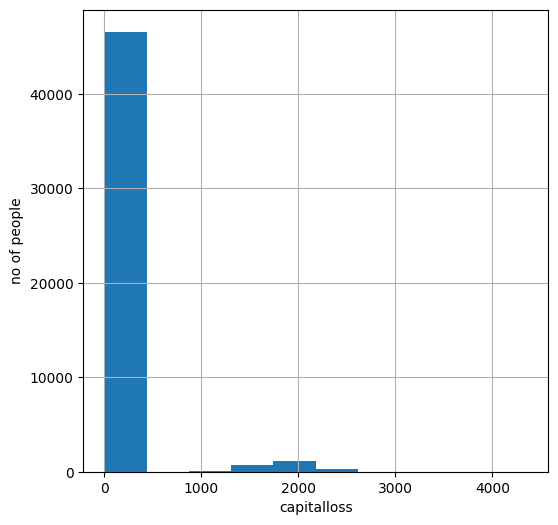

In [24]:
df['capital-loss'].hist(figsize=(6,6))
plt.xlabel('capitalloss')
plt.ylabel('no of people')
plt.show()

<Axes: ylabel='capital-loss'>

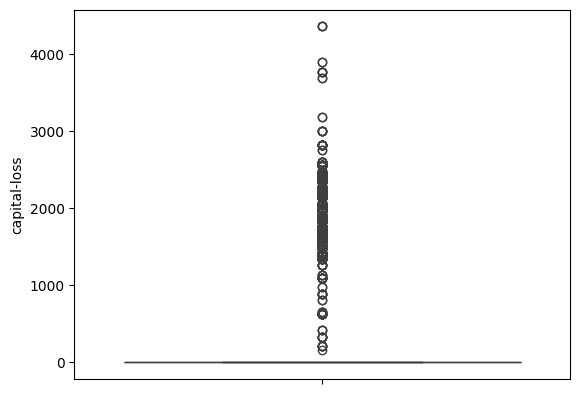

In [25]:
sns.boxplot(df['capital-loss'])

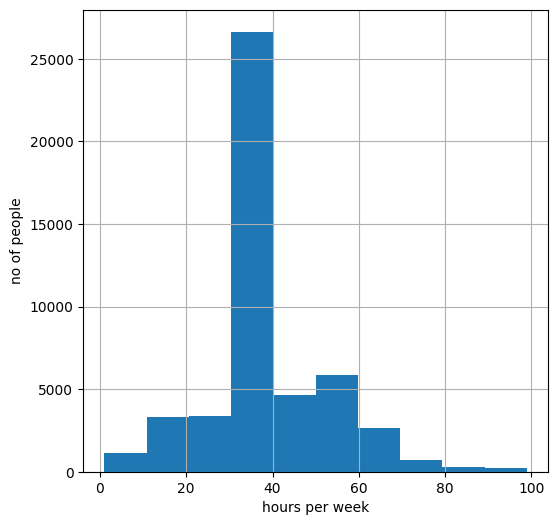

In [26]:
df['hours-per-week'].hist(figsize=(6,6))
plt.xlabel('hours per week')
plt.ylabel('no of people')
plt.show()

<Axes: ylabel='hours-per-week'>

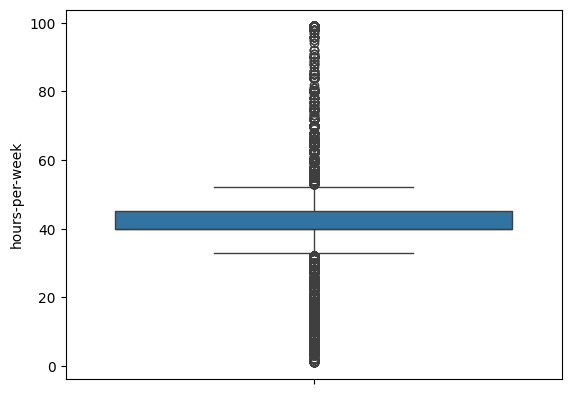

In [27]:
sns.boxplot(df['hours-per-week'])

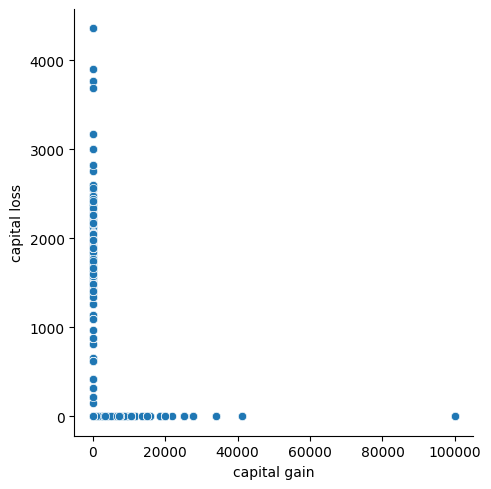

In [28]:
sns.relplot(x='capital-gain',y='capital-loss',data=df)
plt.xlabel('capital gain')
plt.ylabel('capital loss')
plt.show()

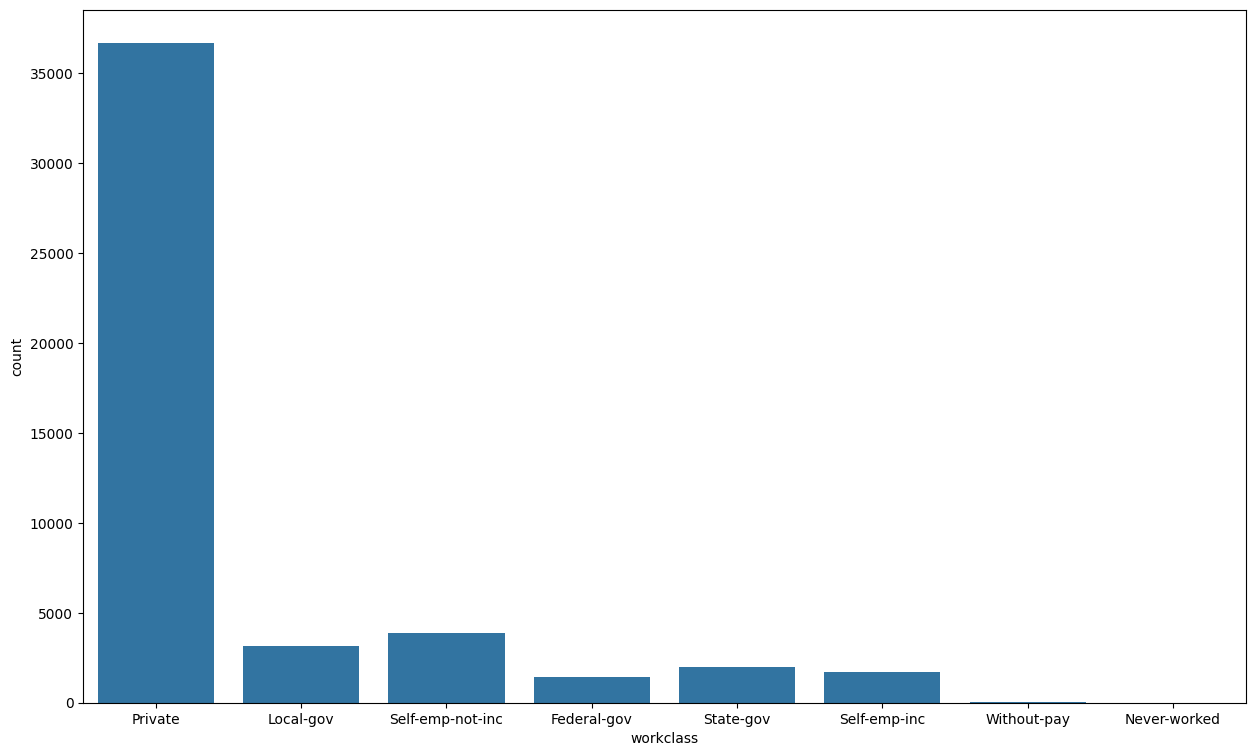

In [29]:
plt.figure(figsize=(15,9))

ax=sns.countplot(x='workclass',data=df)

plt.show()

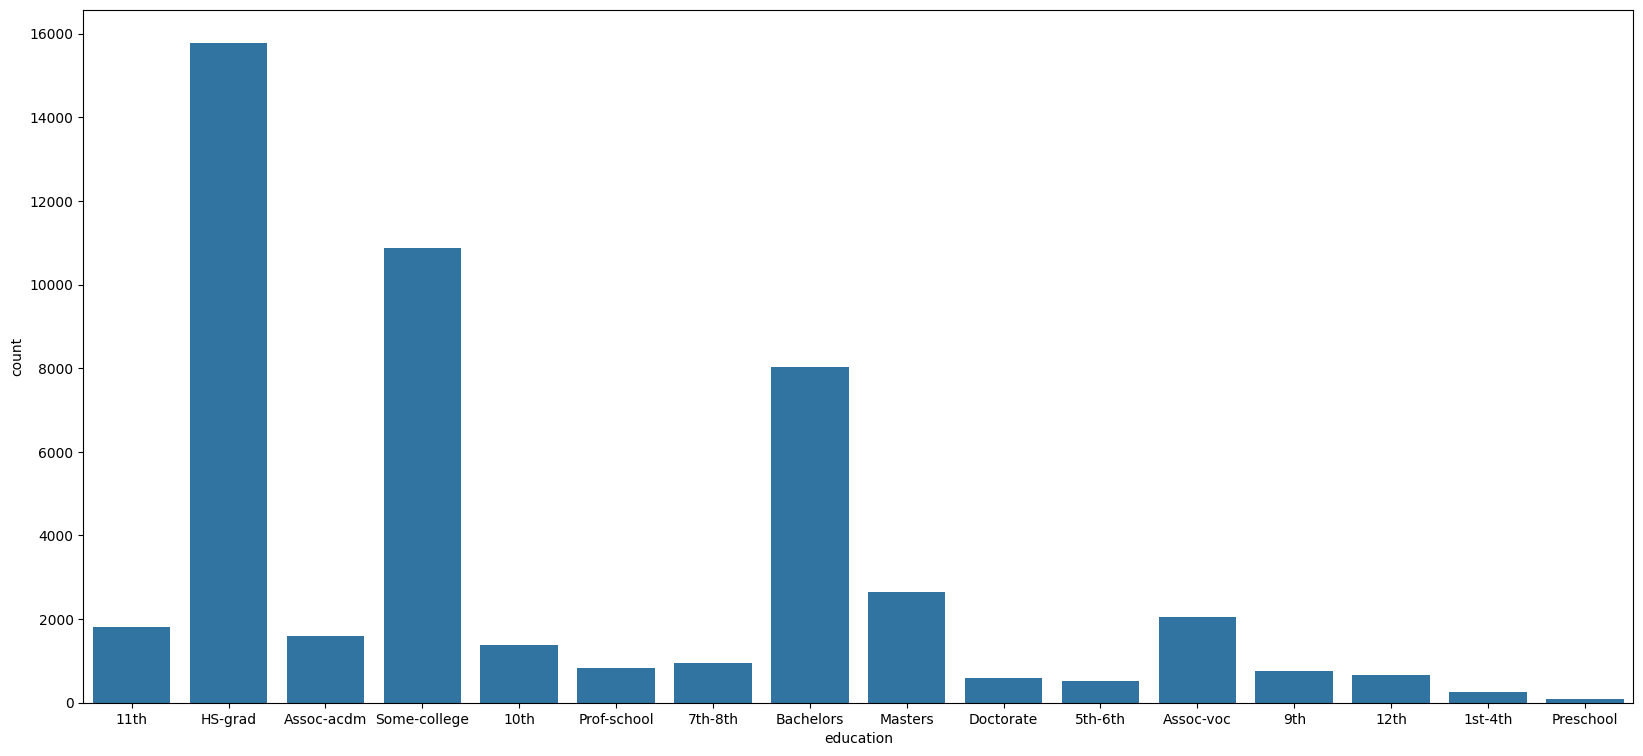

In [30]:
plt.figure(figsize=(20,9))

ax=sns.countplot(x='education',data=df)

plt.show()

In [31]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


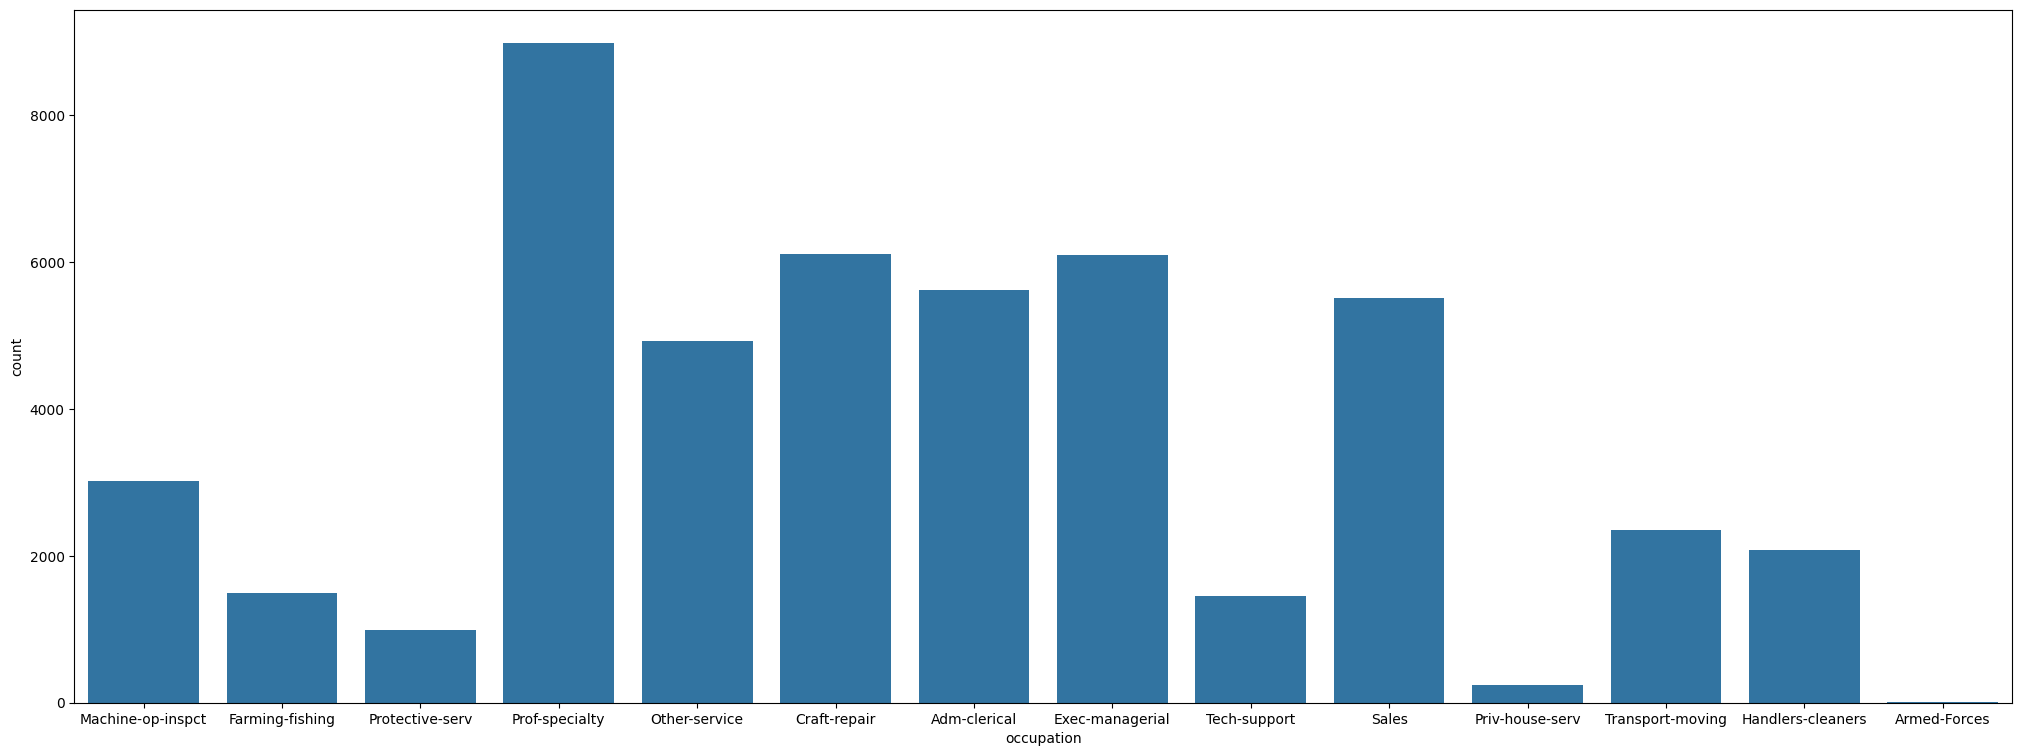

In [32]:
plt.figure(figsize=(25,9))

ax=sns.countplot(x='occupation',data=df)

plt.show()

In [33]:
df[df['education']=='HS-grad'].shape

(15784, 14)

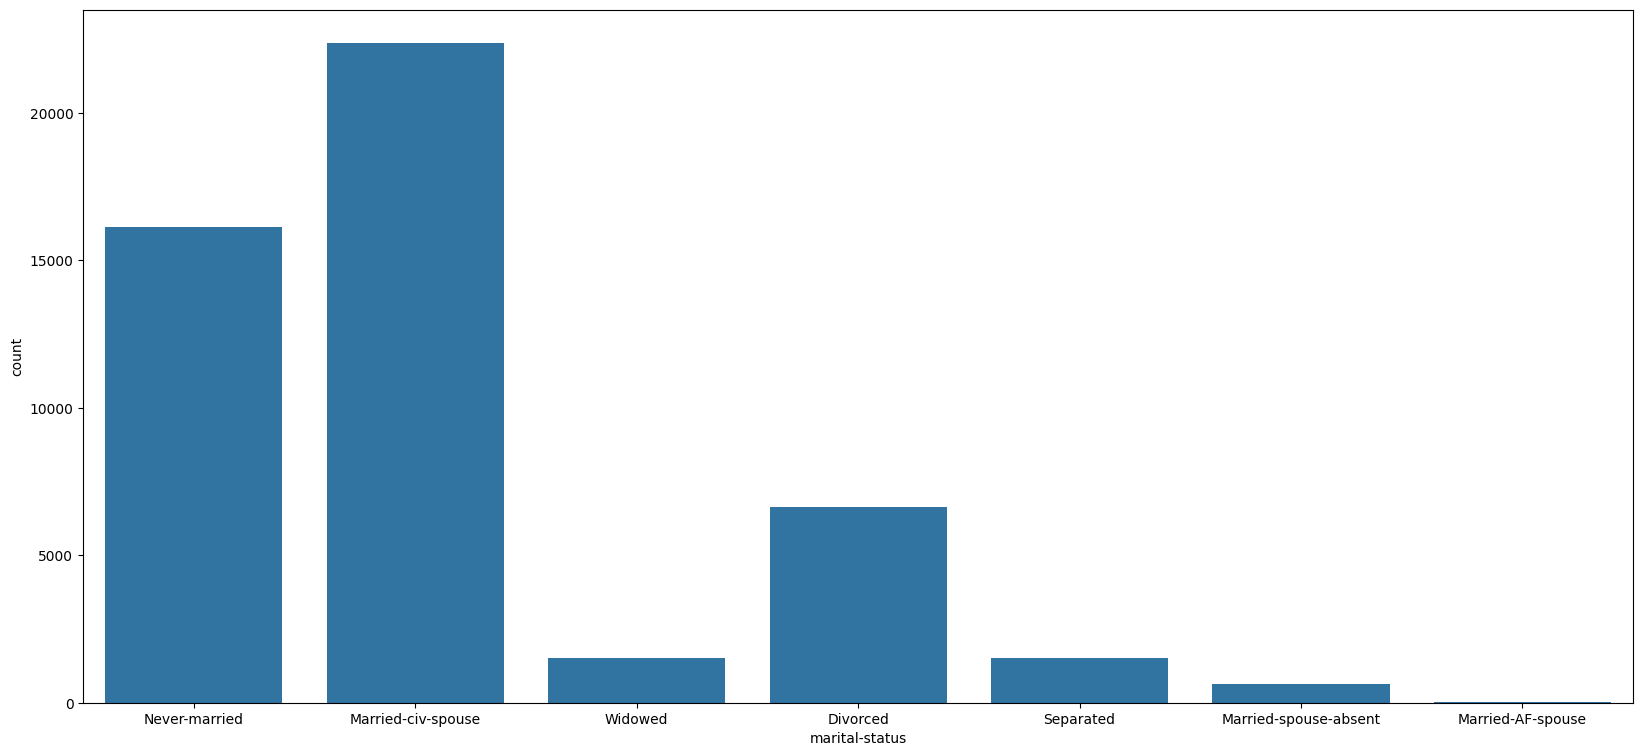

In [34]:
plt.figure(figsize=(20,9))

ax=sns.countplot(x='marital-status',data=df)

plt.show()

In [35]:
df[df['marital-status']=='Married-AF-spouse'].shape

(37, 14)

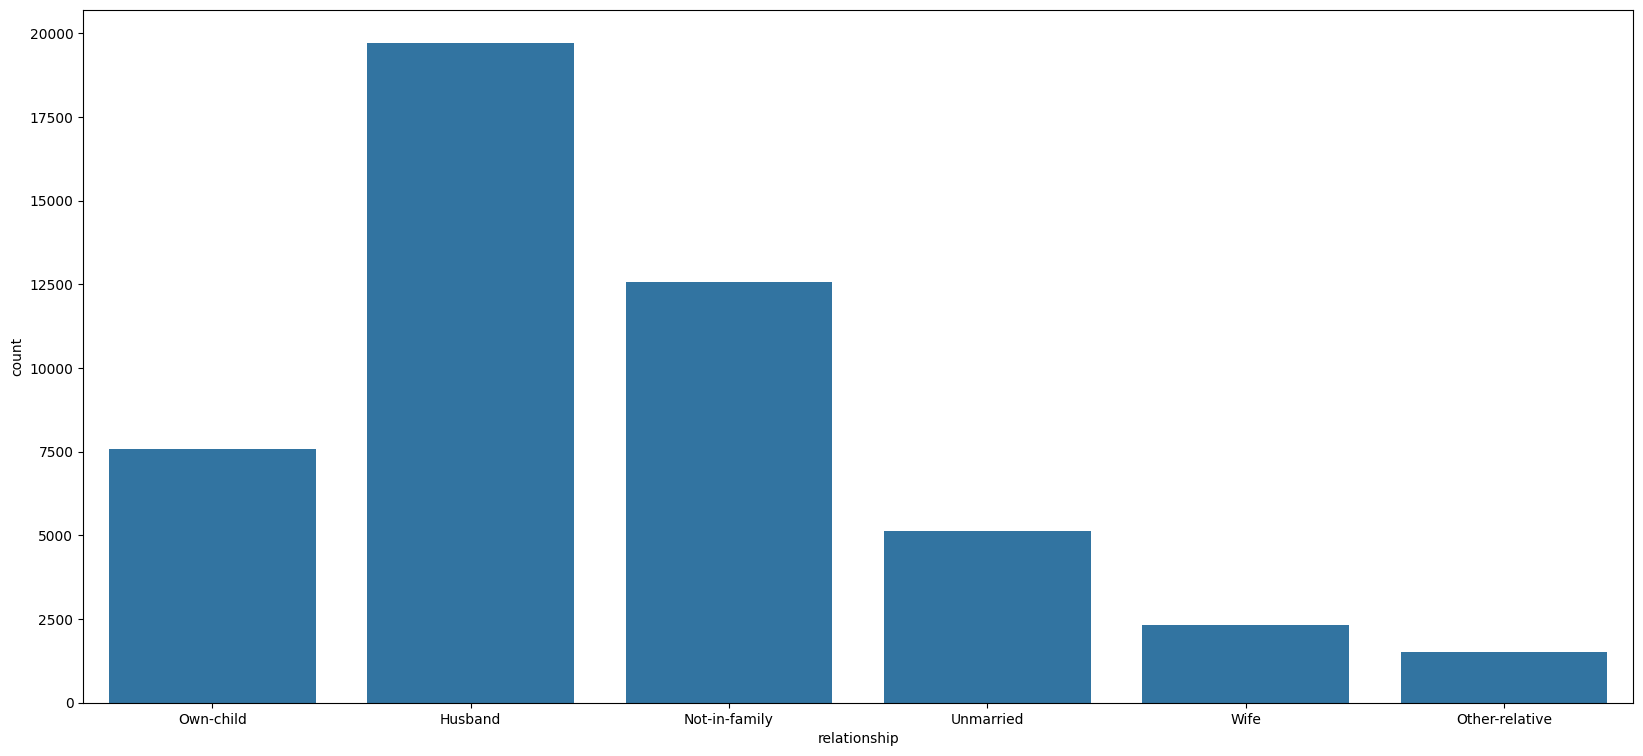

In [36]:
plt.figure(figsize=(20,9))

ax=sns.countplot(x='relationship',data=df)

plt.show()

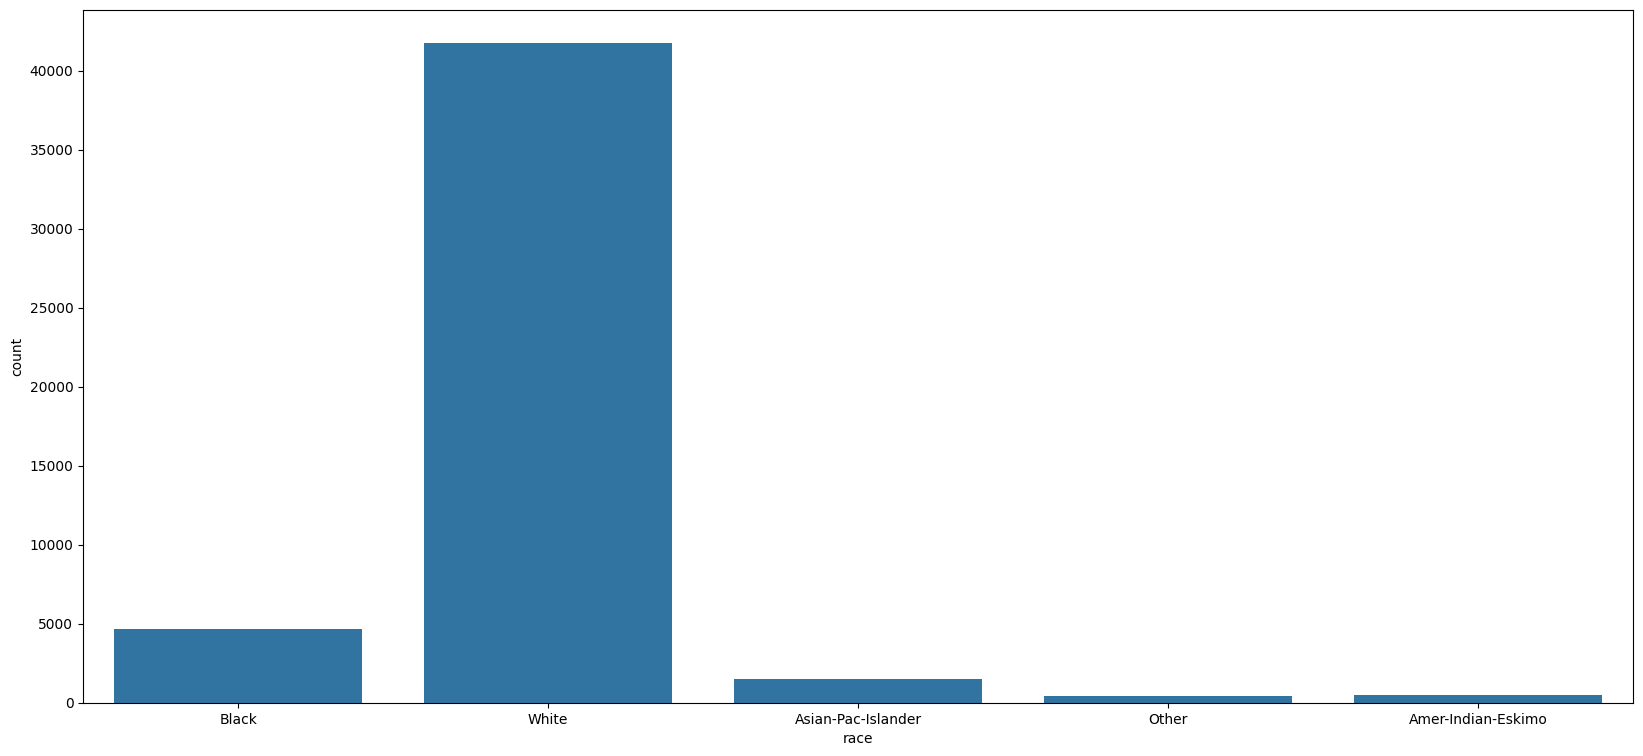

In [37]:
plt.figure(figsize=(20,9))

ax=sns.countplot(x='race',data=df)

plt.show()

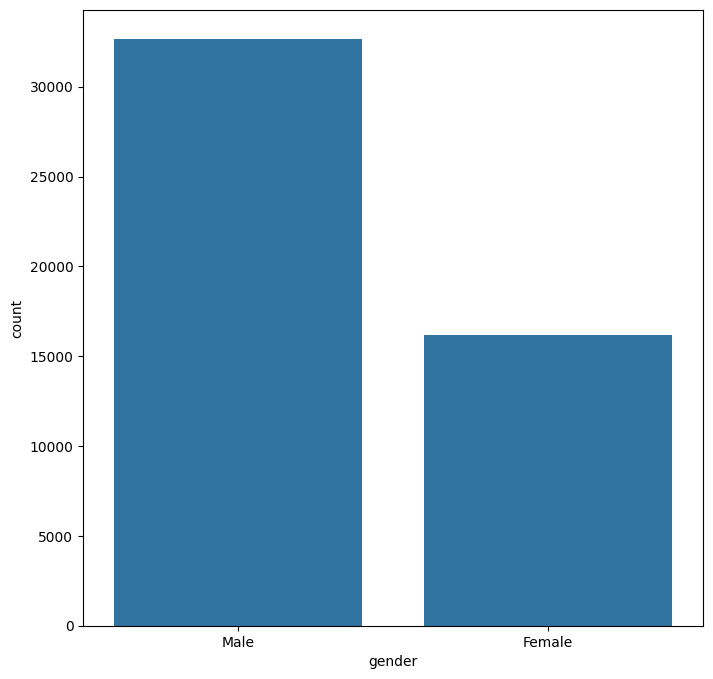

In [38]:
plt.figure(figsize=(8,8))

ax=sns.countplot(x='gender',data=df)

plt.show()

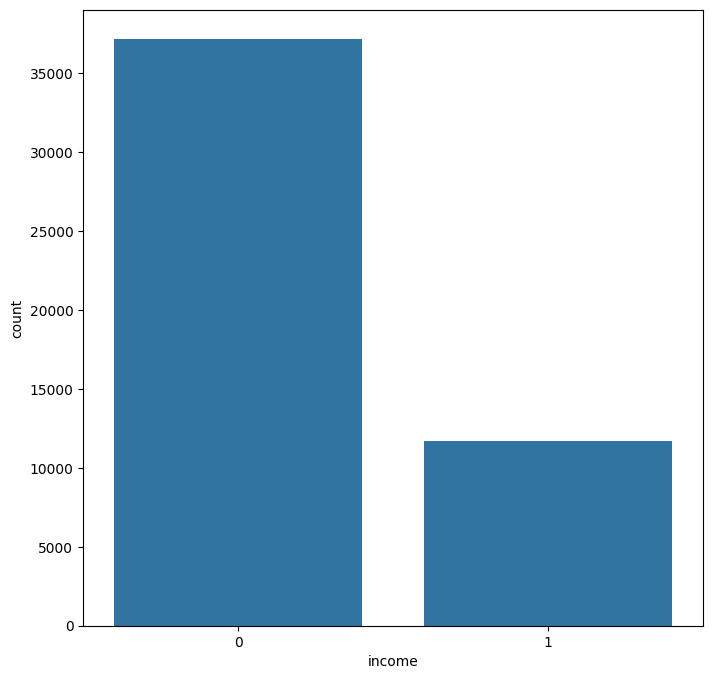

In [39]:
plt.figure(figsize=(8,8))

ax=sns.countplot(x='income',data=df)

plt.show()

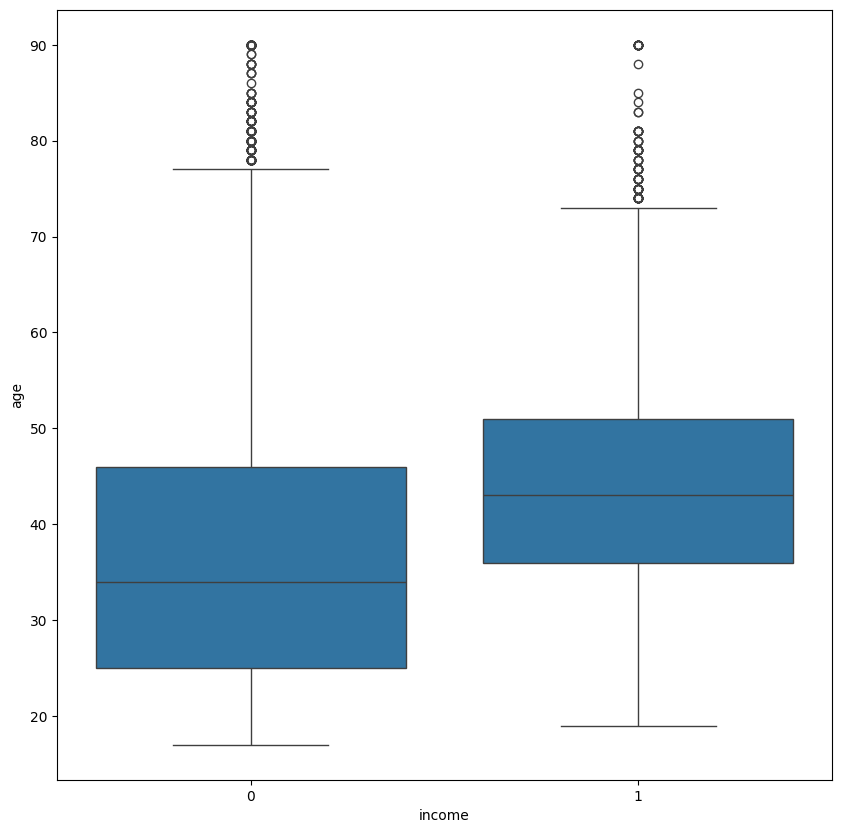

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=df)
plt.show()

In [41]:
df[['income','age']].groupby(['income'],as_index=False).median().sort_values(by='age',ascending=False)

,income,age
1,1,43.0
0,0,34.0


In [42]:
import random
datatest=df[(np.abs(stats.zscore(df['age']))<3)]

income_1=datatest[datatest['income']==1]['age']
income_0=datatest[datatest['income']==0]['age']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [43]:
from scipy.stats import ttest_ind

In [44]:
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p_value',pval)

if pval <=0.05:
    print('we reject null hypothesis hence dependent or have relationship')
else:
     print('we accept null hypothesis so not dependent or have relationship')


ttest 3.0987448279653784
p_value 0.002244682178678284
we reject null hypothesis hence dependent or have relationship


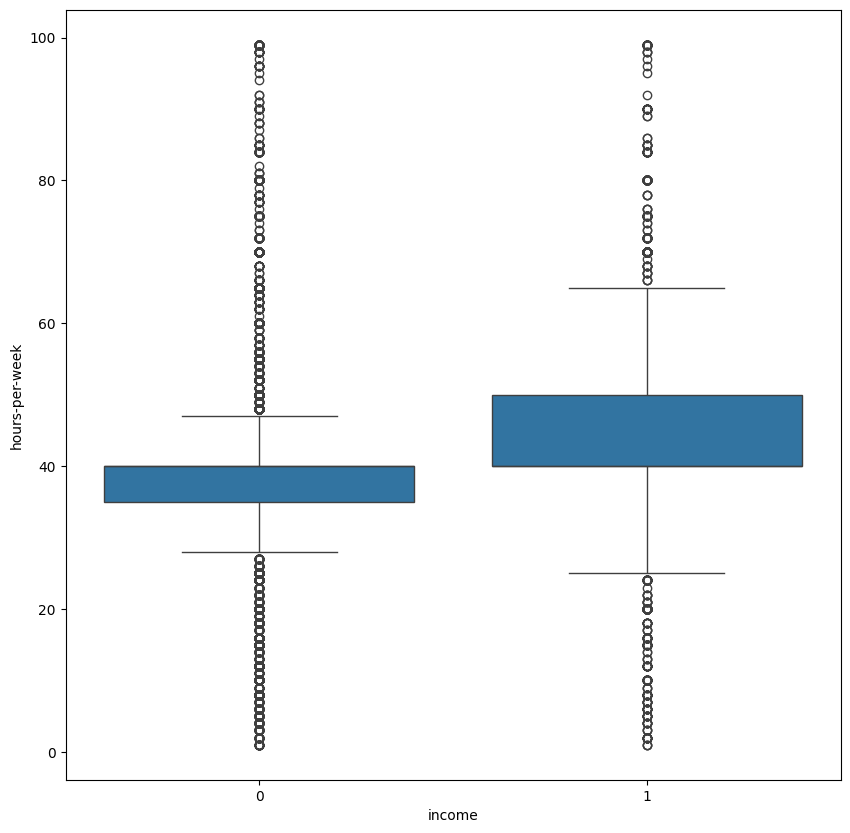

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.show()

In [46]:
df[['income','hours-per-week']].groupby(['income'],as_index=False).median().sort_values(by='hours-per-week',ascending=False)

,income,hours-per-week
0,0,40.0
1,1,40.0


Hours per week

In [47]:
import random
datatest=df[(np.abs(stats.zscore(df['hours-per-week']))<3)]

income_1=datatest[datatest['income']==1]['hours-per-week']
income_0=datatest[datatest['income']==0]['hours-per-week']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [48]:
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p_value',pval)

if pval <=0.05:
    print('we reject null hypothesis hence dependent or have relationship')
else:
     print('we accept null hypothesis so not dependent or have relationship')

ttest 4.810170625189581
p_value 3.0053056289230164e-06
we reject null hypothesis hence dependent or have relationship


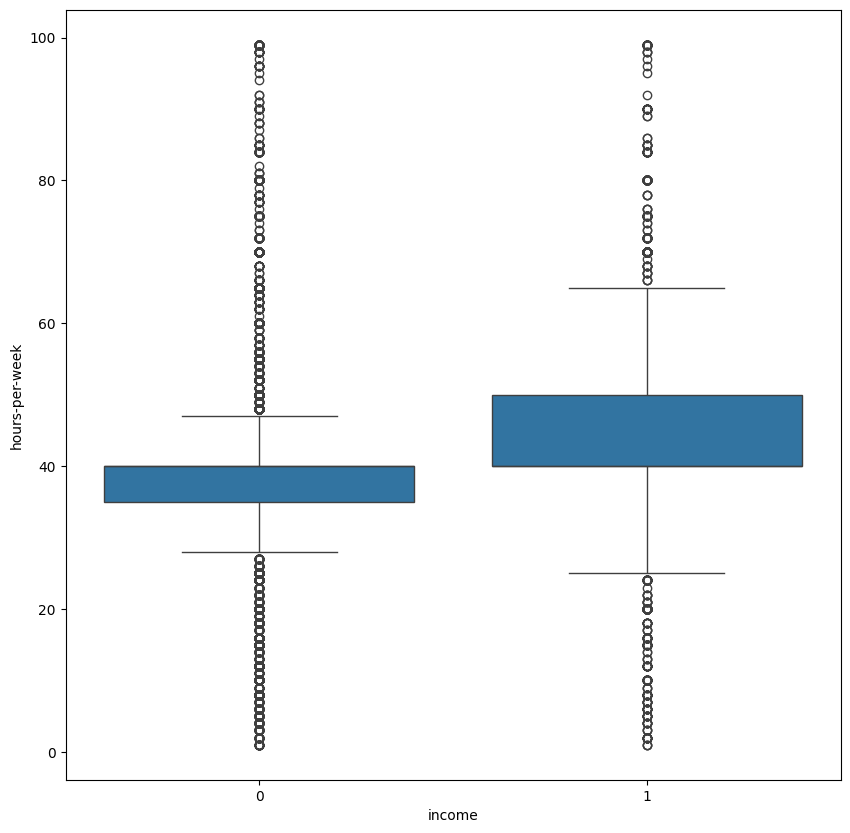

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.show()

Work class vs income

i.Plot (Relationship with income)

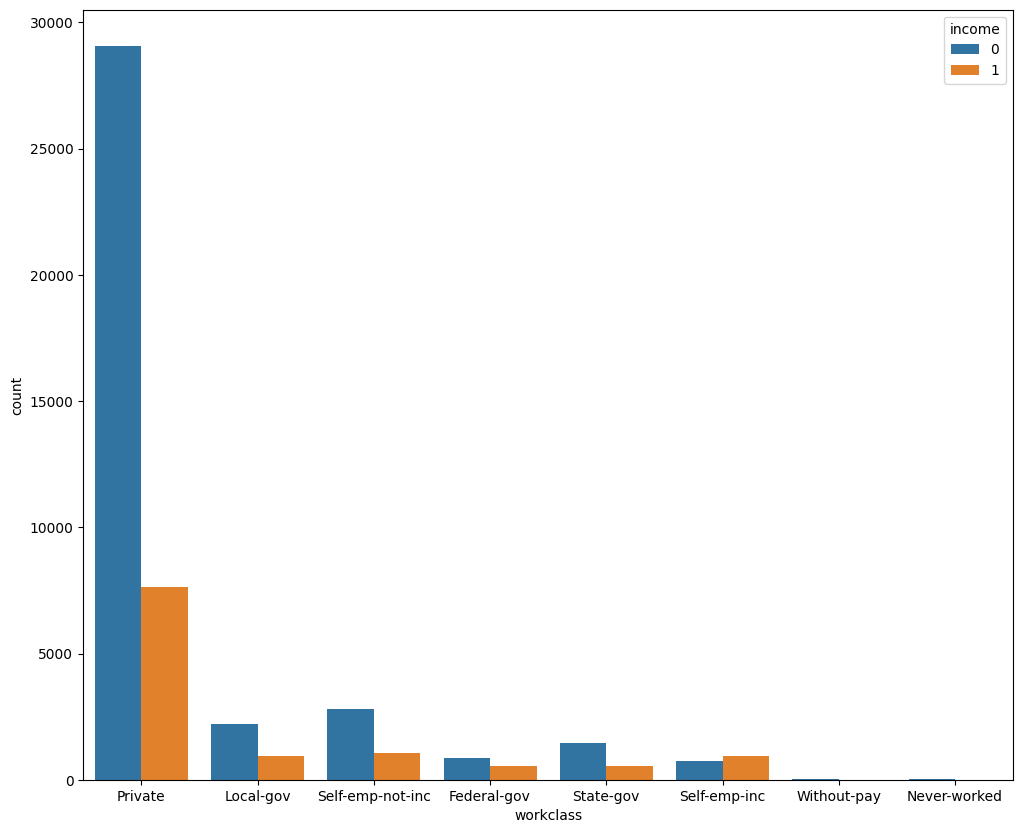

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(x='workclass',hue='income',data=df)
plt.show()

chisquare test to test relationship between income and workclass

In [56]:
c_t=pd.crosstab(df['workclass'].sample(frac=0.004,replace=True,random_state=1),df['income'].sample(frac=0.004,replace=True,random_state=1))
c_t

income,0,1
workclass,,
Federal-gov,3,4
Local-gov,11,5
Private,104,38
Self-emp-inc,3,2
Self-emp-not-inc,12,7
State-gov,6,0


In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)
if p<=0.05:
    print('Dependent reject Ho')
else:
    print('InDependent Accept Ho')


5
p_value 0.2675096482718801
[[  4.98974359   2.01025641]
 [ 11.40512821   4.59487179]
 [101.22051282  40.77948718]
 [  3.56410256   1.43589744]
 [ 13.54358974   5.45641026]
 [  4.27692308   1.72307692]]
InDependent Accept Ho


Education

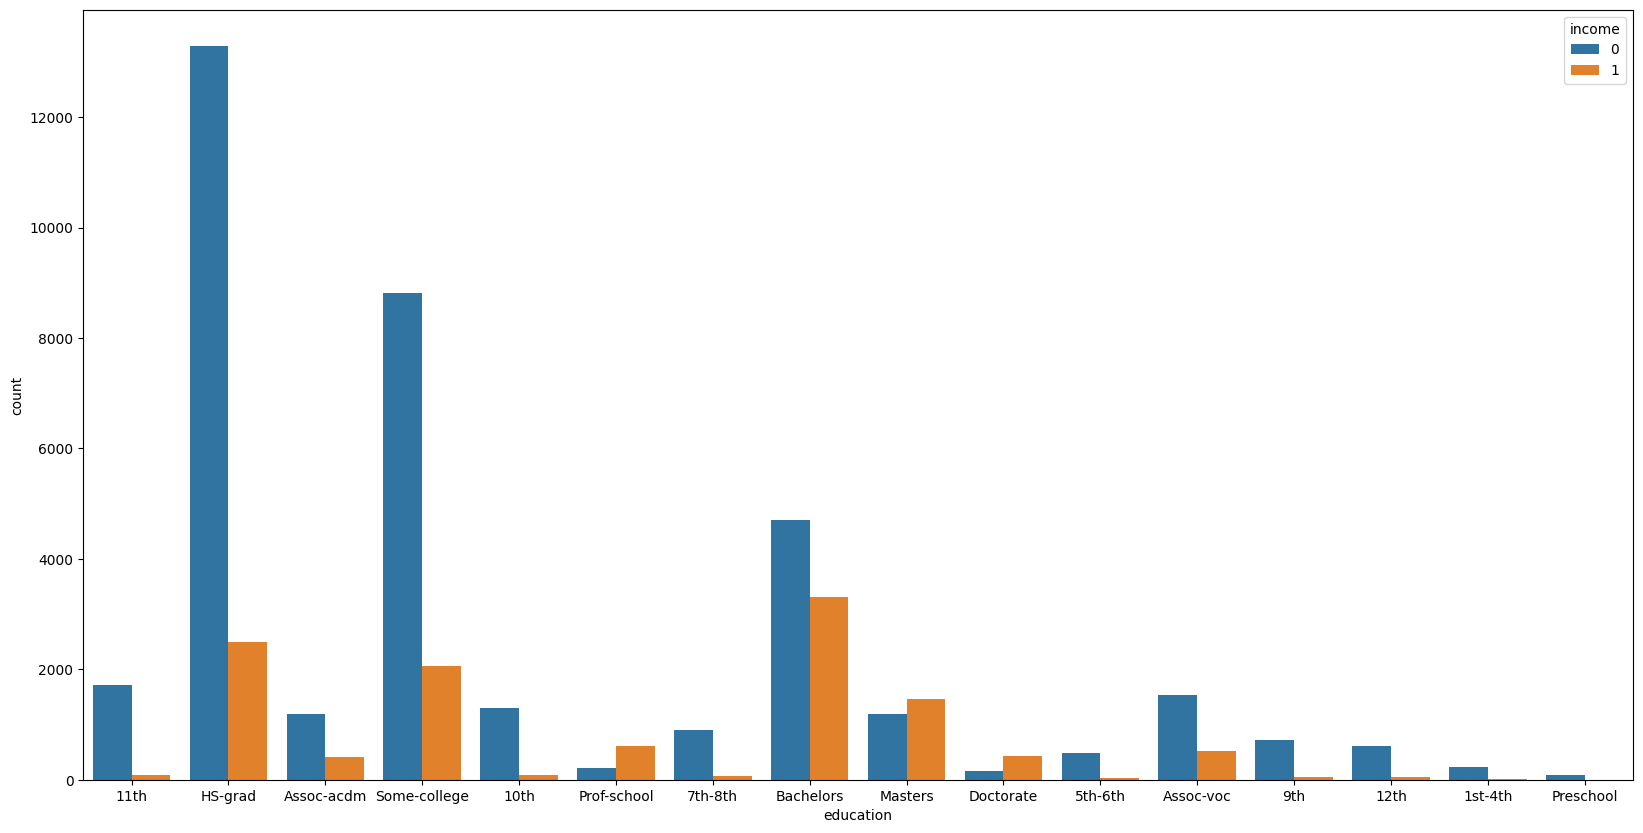

In [58]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='education',hue='income',data=df)
plt.show()

In [62]:
c_t=pd.crosstab(df['education'].sample(frac=0.04,random_state=1),df['income'].sample(frac=0.04,random_state=1))
c_t

income,0,1
education,,
10th,42,7
11th,74,6
12th,19,5
1st-4th,11,1
5th-6th,24,1
7th-8th,32,4
9th,22,1
Assoc-acdm,35,15
Assoc-voc,69,12


In [63]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)
if p<=0.05:
    print('Dependent reject Ho')
else:
    print('InDependent Accept Ho')

15
p_value 2.7482806731241314e-45
[[ 37.31422723  11.68577277]
 [ 60.92118731  19.07881269]
 [ 18.27635619   5.72364381]
 [  9.1381781    2.8618219 ]
 [ 19.03787103   5.96212897]
 [ 27.41453429   8.58546571]
 [ 17.51484135   5.48515865]
 [ 38.07574207  11.92425793]
 [ 61.68270215  19.31729785]
 [274.90685773  86.09314227]
 [ 13.70726714   4.29273286]
 [510.21494371 159.78505629]
 [ 73.10542477  22.89457523]
 [  3.80757421   1.19242579]
 [ 22.84544524   7.15455476]
 [300.03684749  93.96315251]]
Dependent reject Ho


Marital status

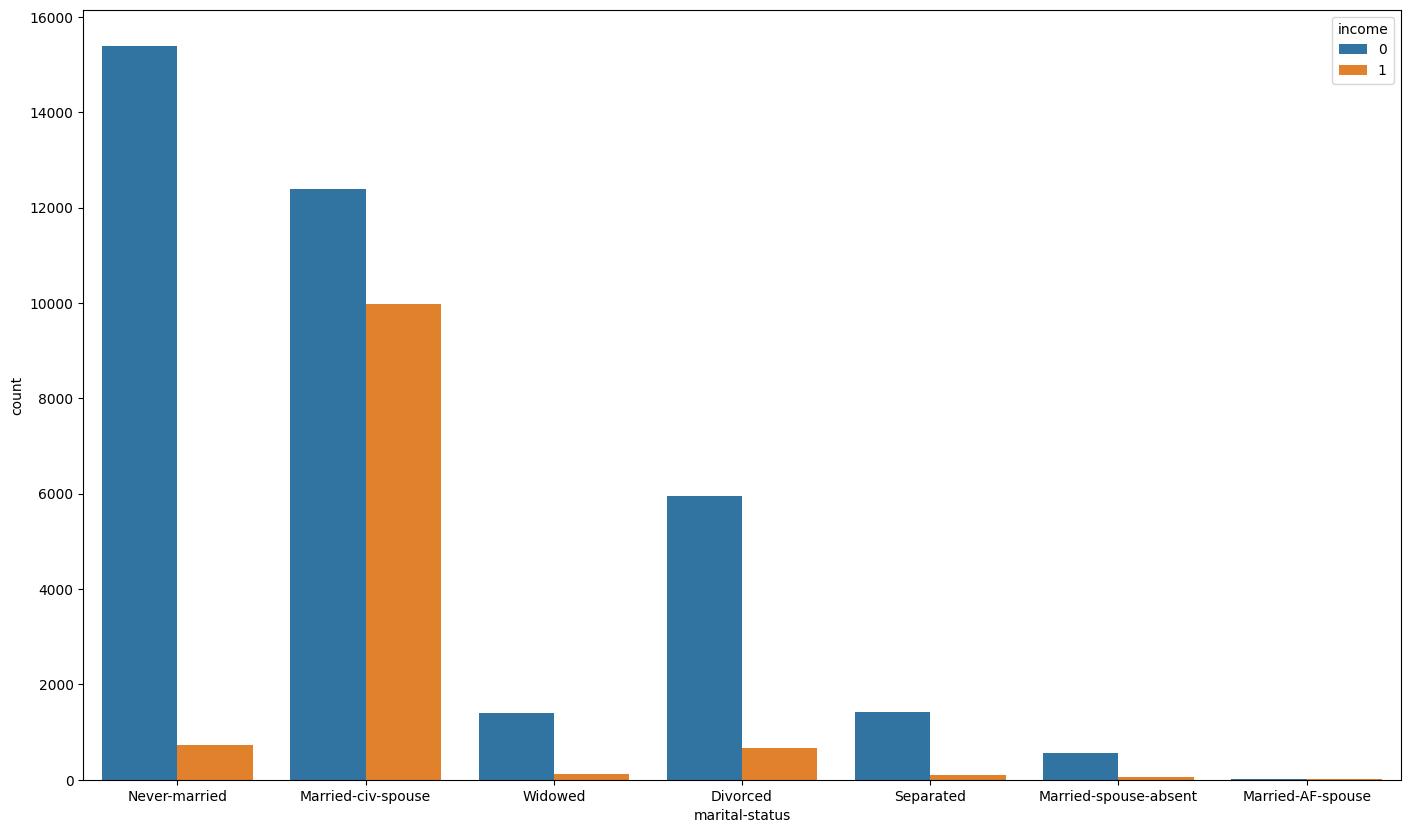

In [65]:
plt.figure(figsize=(17,10))
ax=sns.countplot(x='marital-status',hue='income',data=df)
plt.show()

In [66]:
c_t=pd.crosstab(df['marital-status'].sample(frac=0.04,random_state=1),df['income'].sample(frac=0.04,random_state=1))
c_t

income,0,1
marital-status,,
Divorced,240,32
Married-AF-spouse,2,0
Married-civ-spouse,496,395
Married-spouse-absent,37,4
Never-married,611,24
Separated,49,5
Widowed,53,6


In [67]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)
if p<=0.05:
    print('Dependent reject Ho')
else:
    print('InDependent Accept Ho')

6
p_value 2.7651058255155762e-80
[[2.07132037e+02 6.48679632e+01]
 [1.52302968e+00 4.76970317e-01]
 [6.78509724e+02 2.12490276e+02]
 [3.12221085e+01 9.77789150e+00]
 [4.83561924e+02 1.51438076e+02]
 [4.11218014e+01 1.28781986e+01]
 [4.49293756e+01 1.40706244e+01]]
Dependent reject Ho


Occupation

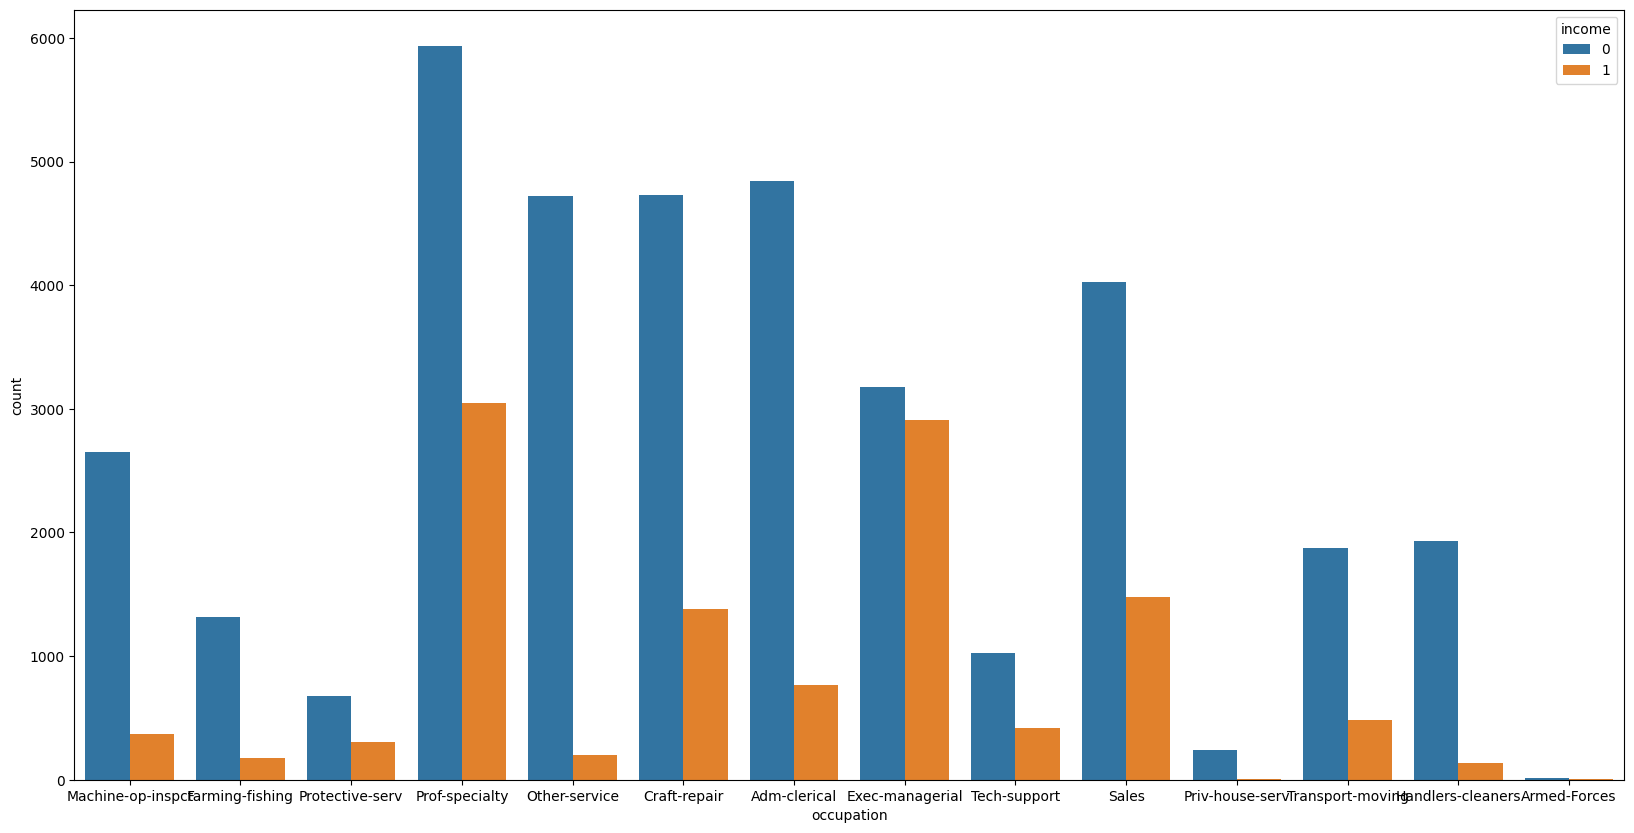

In [68]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='occupation',hue='income',data=df)
plt.show()

In [71]:
c_t=pd.crosstab(df['occupation'].sample(frac=0.04,random_state=1),df['income'].sample(frac=0.04,random_state=1))
c_t

income,0,1
occupation,,
Adm-clerical,204,32
Craft-repair,173,46
Exec-managerial,135,120
Farming-fishing,54,7
Handlers-cleaners,87,4
Machine-op-inspct,92,25
Other-service,177,8
Priv-house-serv,3,0
Prof-specialty,243,115


In [72]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)
if p<=0.05:
    print('Dependent reject Ho')
else:
    print('InDependent Accept Ho')

12
p_value 3.521385386968614e-30
[[179.71750256  56.28249744]
 [166.77175026  52.22824974]
 [194.18628454  60.81371546]
 [ 46.45240532  14.54759468]
 [ 69.29785056  21.70214944]
 [ 89.09723644  27.90276356]
 [140.88024565  44.11975435]
 [  2.28454452   0.71545548]
 [272.6223132   85.3776868 ]
 [ 31.2221085    9.7778915 ]
 [178.95598772  56.04401228]
 [ 39.59877175  12.40122825]
 [ 76.91299898  24.08700102]]
Dependent reject Ho


Relationship

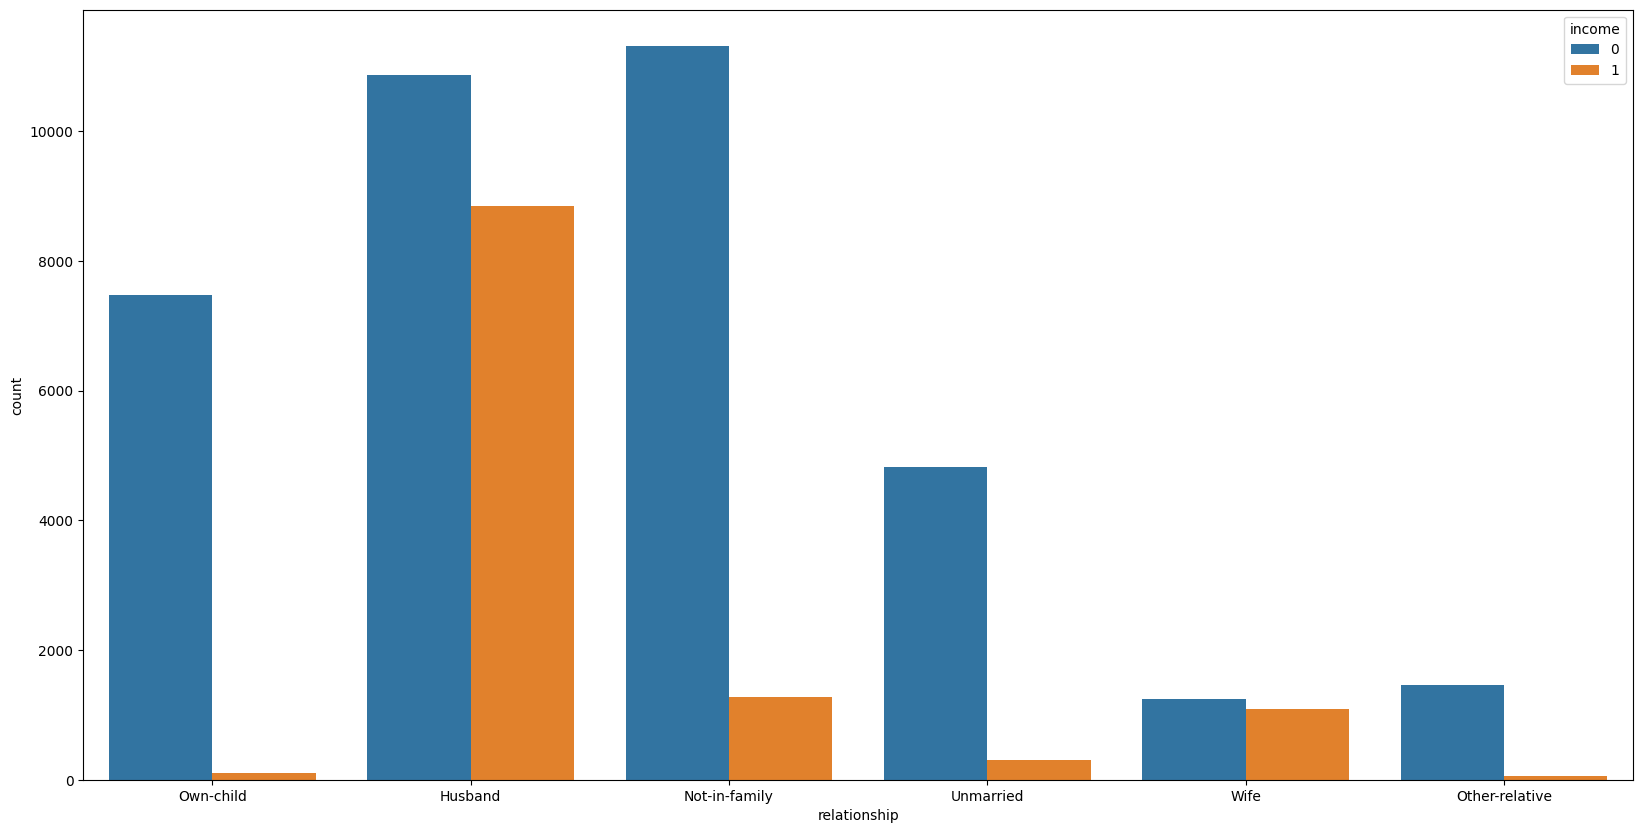

In [73]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='relationship',hue='income',data=df)
plt.show()

In [74]:
c_t=pd.crosstab(df['relationship'].sample(frac=0.04,random_state=1),df['income'].sample(frac=0.04,random_state=1))
c_t

income,0,1
relationship,,
Husband,443,355
Not-in-family,435,48
Other-relative,57,2
Own-child,313,4
Unmarried,199,20
Wife,41,37


In [75]:
stat,p,dof,expected=chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)
if p<=0.05:
    print('Dependent reject Ho')
else:
    print('InDependent Accept Ho')

5
p_value 2.259735031276822e-82
[[607.6888434  190.3111566 ]
 [367.81166837 115.18833163]
 [ 44.92937564  14.07062436]
 [241.40020471  75.59979529]
 [166.77175026  52.22824974]
 [ 59.39815763  18.60184237]]
Dependent reject Ho


Race